In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
# Load dataset
df = pd.read_excel('/content/drive/MyDrive/Rupok_ADP/Enzyme A+Z_1000.xlsx')
df.head()

,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,...,PAAC33,PAAC34,PAAC35,PAAC36,PAAC37,PAAC38,PAAC39,PAAC40,PAAC41,Target
0,1,1,0,0,0,0,1,1,1,0,...,2.567,2.452,2.601,2.442,2.281,2.534,2.356,2.539,2.451,1
1,1,1,0,0,0,0,1,1,0,0,...,2.666,2.473,2.523,2.493,2.487,2.440,2.479,2.467,2.373,1
2,1,1,1,0,0,0,1,1,1,0,...,2.666,2.473,2.523,2.493,2.487,2.440,2.479,2.467,2.373,1
3,1,1,1,0,0,0,1,1,1,1,...,2.436,2.488,2.427,2.392,2.464,2.489,2.337,2.556,2.543,1
4,1,1,0,0,0,0,1,1,1,0,...,2.495,2.401,2.427,2.341,2.530,2.502,2.477,2.495,2.661,1


In [13]:
# Split data into independent (X) and dependent (Y) columns
y = df['Target'].values
X = df.drop('Target', axis=1).values

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=20)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression( max_iter=1000, random_state=20)
model.fit(X_train, y_train)

# Predictions and Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)

cmann = confusion_matrix(y_test, y_pred)
print(cmann)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)

# Probabilities and AUC
p = model.predict_proba(X_test)[:, 1]

# Precision-Recall values
precision_5, recall_5, thresholds_pr = precision_recall_curve(y_test, p)

# AUPR (Average Precision Score)
aupr_score5 = average_precision_score(y_test, p)
print("AUPR =", aupr_score5)

# (Optional) Compute area under PR curve manually
from sklearn.metrics import auc
aupr_manual5 = auc(recall_5, precision_5)
aupr_manual5

[[696  94]
 [131 303]]
81.61764705882352
AUPR = 0.7409110145610014


np.float64(0.7395830072328887)

## RF

In [17]:
# Split data into independent (X) and dependent (Y) columns
y = df['Target'].values
X = df.drop('Target', axis=1).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.48, random_state=28)

# Feature scaling (important for KNN)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Use KNN instead of XGBoost
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=1)  # Euclidean distance
model.fit(X_train, y_train)

# Predictions and Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)

cmann = confusion_matrix(y_test, y_pred)
print(cmann)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)

# Probabilities and AUC
p = model.predict_proba(X_test)[:, 1]

# Precision-Recall values
precision_4, recall_4, thresholds_pr = precision_recall_curve(y_test, p)

# AUPR (Average Precision Score)
aupr_score4 = average_precision_score(y_test, p)
print("AUPR =", aupr_score4)

# (Optional) Compute area under PR curve manually
from sklearn.metrics import auc
aupr_manual4 = auc(recall_4, precision_4)
aupr_manual4

[[2199  370]
 [ 361  986]]
81.33299284984679
AUPR = 0.7244392325135383


np.float64(0.8014382942415622)

## XGBoost

In [20]:
# Split data into independent (X) and dependent (Y) columns
y = df['Target'].values
X = df.drop('Target', axis=1).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.38, random_state=28)

# Feature scaling (important for KNN)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Use SVM instead of MLPClassifier
from sklearn.svm import SVC
model = SVC(kernel='rbf', probability=True, random_state=20)  # probability=True is required for predict_proba
model.fit(X_train, y_train)

# Predictions and Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)

cmann = confusion_matrix(y_test, y_pred)
print(cmann)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)

# Probabilities and AUC
p = model.predict_proba(X_test)[:, 1]

# Precision-Recall values
precision_3, recall_3, thresholds_pr = precision_recall_curve(y_test, p)

# AUPR (Average Precision Score)
aupr_score3 = average_precision_score(y_test, p)
print("AUPR =", aupr_score3)

# (Optional) Compute area under PR curve manually
from sklearn.metrics import auc
aupr_manual3 = auc(recall_3, precision_3)
aupr_manual3


[[1807  221]
 [ 392  680]]
80.2258064516129
AUPR = 0.8166322390422509


np.float64(0.8164830087146004)

## AdaBoost

In [23]:
# Split data into independent (X) and dependent (Y) columns
y = df['Target'].values
X = df.drop('Target', axis=1).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=20)

# Feature scaling (important for KNN)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Use Decision Tree instead of KNN
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier( criterion='gini', max_depth=10, min_samples_split=5, random_state=20)
model.fit(X_train, y_train)

# Predictions and Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)

cmann = confusion_matrix(y_test, y_pred)
print(cmann)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)

# Probabilities and AUC
p = model.predict_proba(X_test)[:, 1]

# Precision-Recall values
precision_2, recall_2, thresholds_pr = precision_recall_curve(y_test, p)

# AUPR (Average Precision Score)
aupr_score2 = average_precision_score(y_test, p)
print("AUPR =", aupr_score2)

# (Optional) Compute area under PR curve manually
from sklearn.metrics import auc
aupr_manual2 = auc(recall_2, precision_2)
aupr_manual2

[[940 127]
 [158 407]]
82.53676470588235
AUPR = 0.7025475339098746


np.float64(0.730688216201118)

## MLP

In [25]:
# Split data into independent (X) and dependent (Y) columns
y = df['Target'].values
X = df.drop('Target', axis=1).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=20)

# Feature scaling (important for KNN)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Use MLP Classifier instead of RandomForest
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', random_state=20)
model.fit(X_train, y_train)

# Predictions and Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)

cmann = confusion_matrix(y_test, y_pred)
print(cmann)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)

# Probabilities and AUC
p = model.predict_proba(X_test)[:, 1]

# Precision-Recall values
precision_1, recall_1, thresholds_pr = precision_recall_curve(y_test, p)

# AUPR (Average Precision Score)
aupr_score1 = average_precision_score(y_test, p)
print("AUPR =", aupr_score1)

# (Optional) Compute area under PR curve manually
from sklearn.metrics import auc
aupr_manual1 = auc(recall_1, precision_1)
aupr_manual1

[[1231  116]
 [ 126  567]]
88.13725490196079
AUPR = 0.8856222725318784


np.float64(0.8854689313537252)

In [26]:
aupr_manual5 = 0.7418
aupr_manual4 = 0.6934
aupr_manual3 = 0.8261
aupr_manual2 = 0.6847
aupr_manual1 = 0.8874

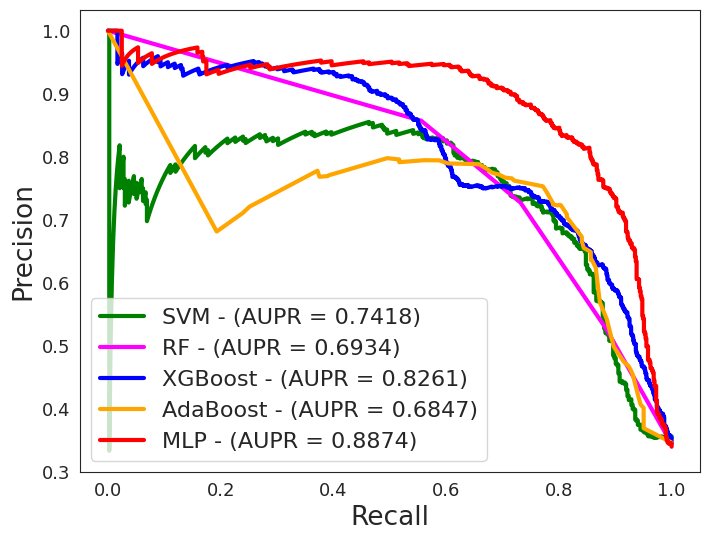

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
plt.figure(figsize=(8, 6))
# Precision-Recall curve
plt.plot( recall_5, precision_5, color="green", label="SVM - (AUPR = %0.4f)" % aupr_manual5, lw=3)
plt.plot( recall_4, precision_4, color="magenta", label="RF - (AUPR = %0.4f)" % aupr_manual4, lw=3)
plt.plot( recall_3, precision_3, color="blue", label="XGBoost - (AUPR = %0.4f)" % aupr_manual3, lw=3)
plt.plot( recall_2, precision_2, color="orange", label="AdaBoost - (AUPR = %0.4f)" % aupr_manual2, lw=3)
plt.plot( recall_1, precision_1, color="red", label="MLP - (AUPR = %0.4f)" % aupr_manual1, lw=3)
plt.xlabel("Recall", fontsize=19)
plt.ylabel("Precision", fontsize=19)
# plt.title("Precision-Recall Curve", fontsize=22)
plt.legend(loc="lower left", fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.savefig('/content/drive/MyDrive/Rupok_ADP/Bashar_AUPR_curve1.png',dpi=800)
plt.savefig('/content/drive/MyDrive/Rupok_ADP/Bashar_AUPR_curve1.pdf',dpi=800)
plt.show()
